# Практична робота №1

# Підготовка даних

Курс "Методи машинного навчання" використовує Colaboratories (Colabs) для всіх програмних вправ. Colab — це реалізація Jupyter Notebook


## Завдання 1

Ви підготуєте числові дані для моделі машинного навчання, пройшовши всі етапи: візуалізація, статистика, нормалізація, обрізання викидів.


Крок 0. Імпорт бібліотек

In [1]:
# Імпортуємо бібліотеку для роботи з таблицями та даними
import pandas as pd

# Імпортуємо бібліотеку для побудови графіків та візуалізацій
import matplotlib.pyplot as plt

# Імпортуємо бібліотеку для розширеної візуалізації та теплових карт
import seaborn as sns

# Імпортуємо класи для нормалізації та масштабування числових даних
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Для зручності візуалізації
%matplotlib inline

Крок 1. Завантаження набору даних
California Housing Кількість записів

20 640 рядків (спостережень)

Кількість ознак

9 стовпців:

longitude – географічна довгота району

latitude – географічна широта району

housing_median_age – медіанний вік будинків у районі

total_rooms – загальна кількість кімнат у районі

total_bedrooms – загальна кількість спалень у районі

population – чисельність населення району

households – кількість домогосподарств

median_income – медіанний дохід домогосподарств (в десятках тисяч доларів)

median_house_value – медіанна вартість житла (цільова змінна, у доларах)

In [2]:
training_df = pd.read_csv(
    "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"
)
#Перегляд перших рядків. Дозволяє швидко побачити приклади даних у таблиці та перевірити, чи всі стовпці коректні.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Крок 2. Огляд даних Інформація про стовпці та типи даних

Використовується df.info().

Показує: кількість рядків, назви стовпців, типи даних (int, float, object), кількість непорожніх значень.

Допомагає зрозуміти, які ознаки числові, які категоріальні, та чи є пропущені значення.

Перевірка пропусків

Використовується df.isnull().sum().

Показує кількість пропущених значень у кожному стовпці.

Пропуски потрібно буде обробити пізніше: або заповнити, або видалити.

In [ ]:
training_df.info()

In [ ]:
training_df.isnull().sum()

### Ваші висновки тут:
...

Крок 3. Візуалізація даних

Гістограми для числових ознак
Використовується df.hist() 
Гістограма показує, як розподілені значення кожної ознаки (наприклад, чи є сильна асиметрія, скупчення, викиди).
Що аналізувати:
Чи є ознаки сильно розкиданими (великий розмах)?
Чи присутні аномально великі або малі значення (викиди)?
Чи розподіляються значення приблизно нормально (важливо для деяких моделей)?

Кореляційна матриця та теплова карта (heatmap)
Використовується df.corr()
Показує кореляції між ознаками (коефіцієнт від -1 до +1).
Що аналізувати:
Які ознаки сильно корельовані з цільовою змінною (median_house_value у California Housing).
Чи є надмірно корельовані ознаки між собою (можлива мультиколінеарність).
Ознаки, що майже не корельовані з цільовою змінною, можуть бути менш інформативні для моделі.

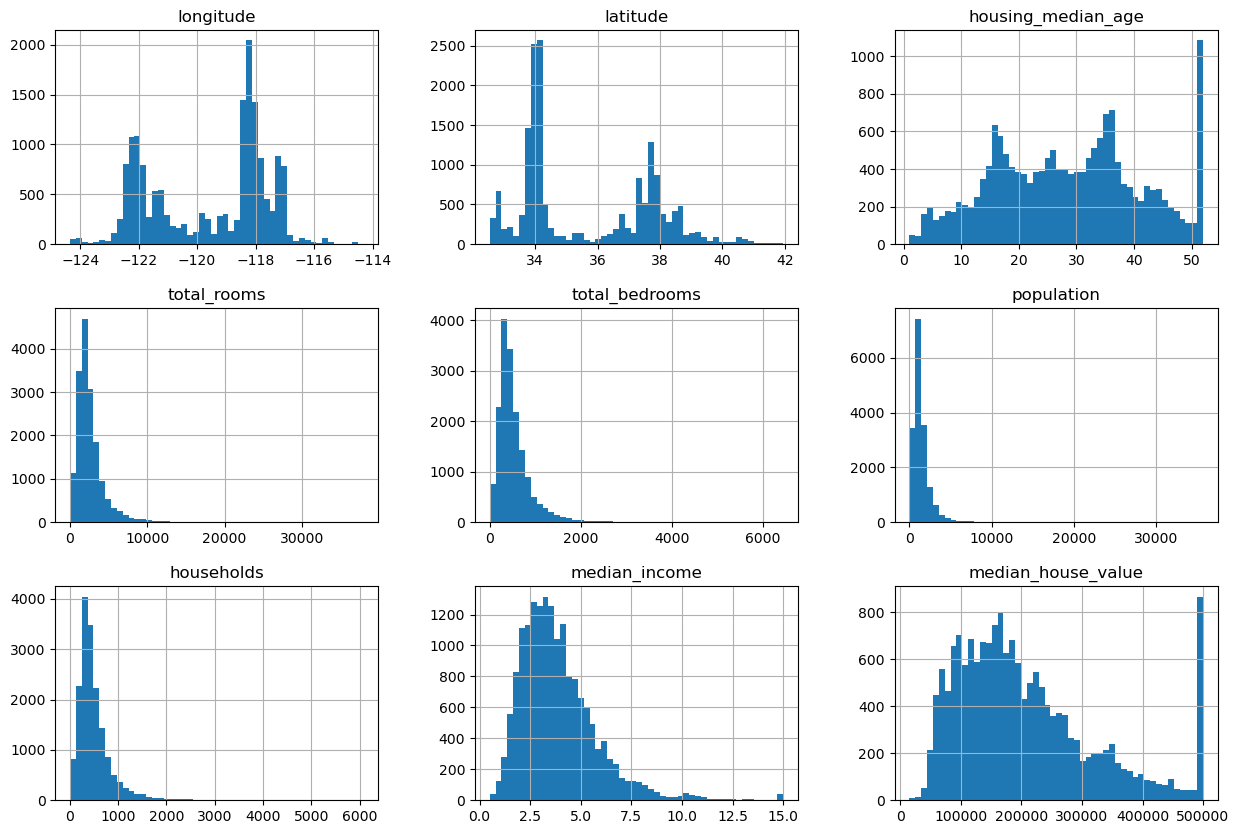

In [4]:
training_df.hist(bins=50, figsize=(15,10))
plt.show()

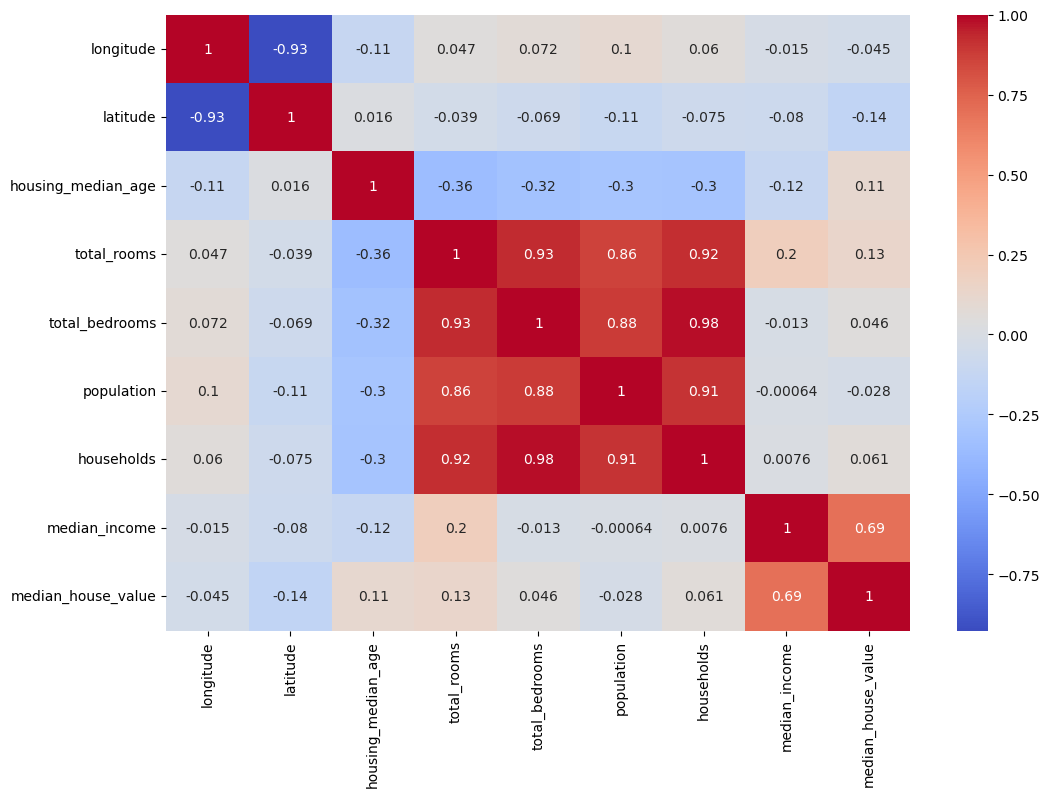

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(training_df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Ваші висновки тут
...

Крок 4. Статистичний аналіз
Основні статистичні характеристики
Використовується метод df.describe().Він обчислює для кожного числового стовпця:
count – кількість непорожніх значень
mean – середнє значення
std – стандартне відхилення
min / max – мінімум і максимум
25%, 50%, 75% – квартилі (медіана – 50%)

Зробити:

Аналіз центральних тенденцій
Середнє (mean) показує типове значення, але може бути чутливим до викидів.
Медіана (50%) показує центр розподілу і менш чутлива до викидів.

Аналіз варіативності
Стандартне відхилення (std) показує, наскільки значення розкидані навколо середнього.
Велике std може свідчити про сильні коливання або наявність викидів.

Виявлення потенційних викидів
Значення, що виходять за межі mean ± 3*std або за межі 1.5*IQR (міжквартильний розмах), можна вважати викидами.

Потрібно вирішити, як їх обробляти: обрізати (clip) або видалити рядки.

In [6]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Ваші висновки тут:
...

Крок 5: Нормалізація числових ознак

Мета цього кроку – масштабувати числові ознаки до єдиного діапазону або середнього, щоб модель навчалася стабільніше та ефективніше.

Чому нормалізація важлива:

    Різні масштаби ознак. У наборі California Housing, наприклад:
        population може мати значення тисячі
        median_income – десятки тисяч
        housing_median_age – десятки

    Моделі машинного навчання, особливо градієнтні методи і нейронні мережі, можуть працювати погано, якщо ознаки мають різні порядки величин.

    Покращення швидкості та стабільності навчання

    Масштабовані ознаки дозволяють алгоритмам швидше сходитися.

    Зменшується ризик, що ознаки з великими значеннями домінуватимуть над іншими.

Що потрібно зробити на практиці:
    Визначити числові ознаки
    Застосувати нормалізацію до всіх числових ознак.


In [10]:

scaler = StandardScaler()
numeric_cols = training_df.select_dtypes(include=['float64', 'int64']).columns
training_df[numeric_cols] = scaler.fit_transform(training_df[numeric_cols])
training_df[numeric_cols]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543,-1.210558
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483,-1.096745
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105,-1.048461
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600,-1.154514
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454,-1.222629
...,...,...,...,...,...,...,...,...,...
16995,-2.342963,2.318265,1.859971,-0.195728,-0.344995,-0.455275,-0.343872,-0.799999,-0.826872
16996,-2.347950,2.369733,0.588774,-0.135174,-0.027073,-0.205236,-0.094203,-0.715727,-1.106230
16997,-2.362912,2.907801,-0.920772,0.015292,-0.019955,-0.161675,-0.117609,-0.446663,-0.894125
16998,-2.362912,2.889085,-0.761872,0.012999,0.029868,-0.114630,-0.060394,-0.997787,-1.047599


### Ваші висновки тут:
...

## Завдання для самостійного виконання
Зробіть аналогічні кроки для набору даних 
Набір даних: Wine Quality (червоне вино).

In [ ]:
wine_df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    sep=';'
)